# Feature Engineering



- Feature engineering involves creating, transforming, and selecting features (input variables) from raw data to improve the performance of machine learning models.


- Missing Values Imputation – Fill or replace missing data.

- Handling Categorical Values – Convert categories to numbers.

- Outlier Detection – Find and handle extreme values.

- Feature Scaling – Normalize/standardize data values.

- Feature Construction – Create new useful features.

- Feature Selection – Choose important features for modeling.

- Feature Extraction – Transform features into a new space (e.g., PCA).



# 1 -Feature Scaling

## Types of Feature Scaling
- Standardization
- Normalization

# Standardization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 

In [18]:
df  = pd.read_csv('Social_Network.csv')


In [19]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:

df=df.iloc[:,2:]

In [21]:
df.sample(5)

,Age,EstimatedSalary,Purchased
211,52,150000,1
227,56,133000,1
224,35,60000,0
109,38,80000,0
99,28,37000,0


# Train test split

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split (df.drop('Purchased', axis = 1),
                                                  df['Purchased'],test_size = 0.3,random_state = 0)

x_train.shape,x_test.shape

((280, 2), (120, 2))

# StandardScaler

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)   ## fit the scaler to the train set, it will learn the  parameters

x_train_scaled = scaler.transform(x_train) ## transform train and test sets
x_test_scaled = scaler.transform(x_test)

In [28]:
scaler.mean_


array([3.78642857e+01, 6.98071429e+04])

In [30]:

x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [37]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [34]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [36]:
np.round(x_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [38]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


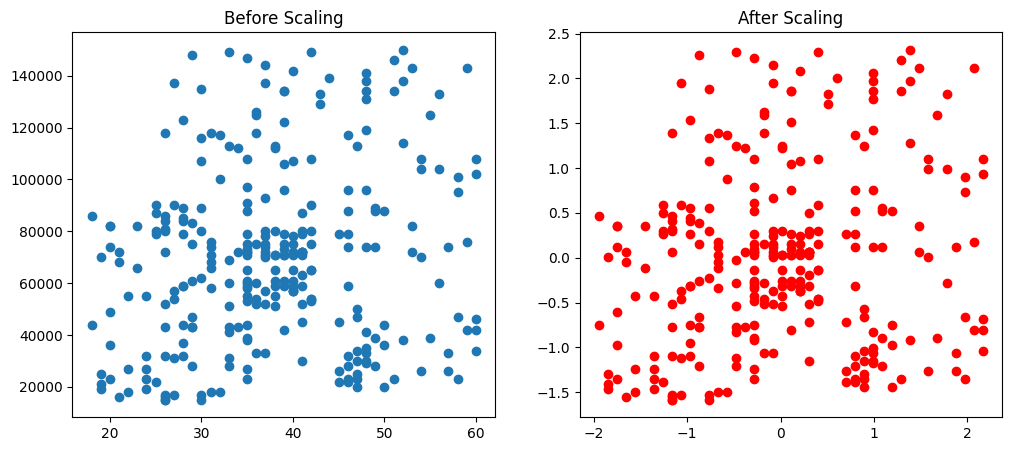

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()


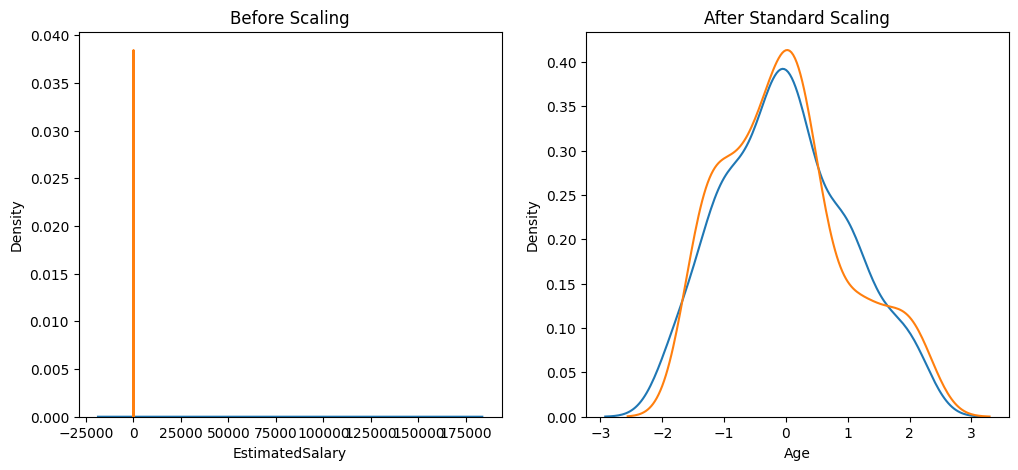

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()


# Comparision of Distribution

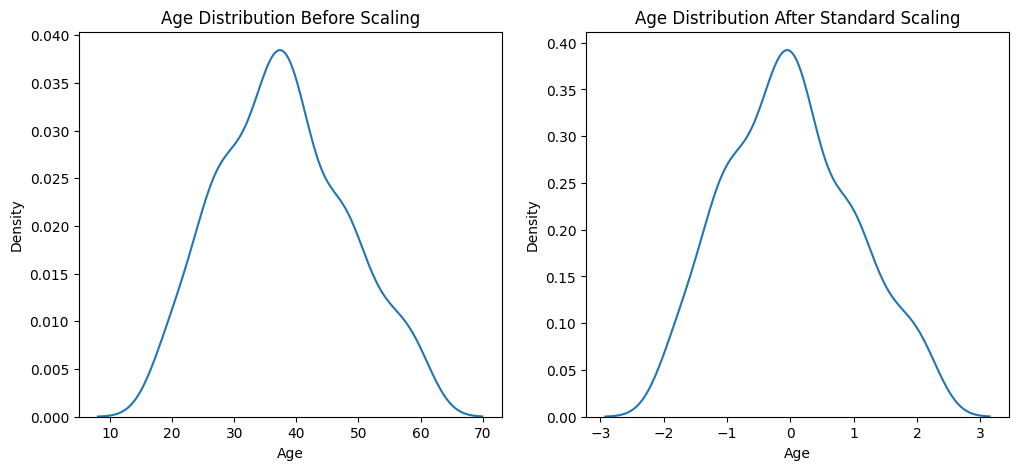

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

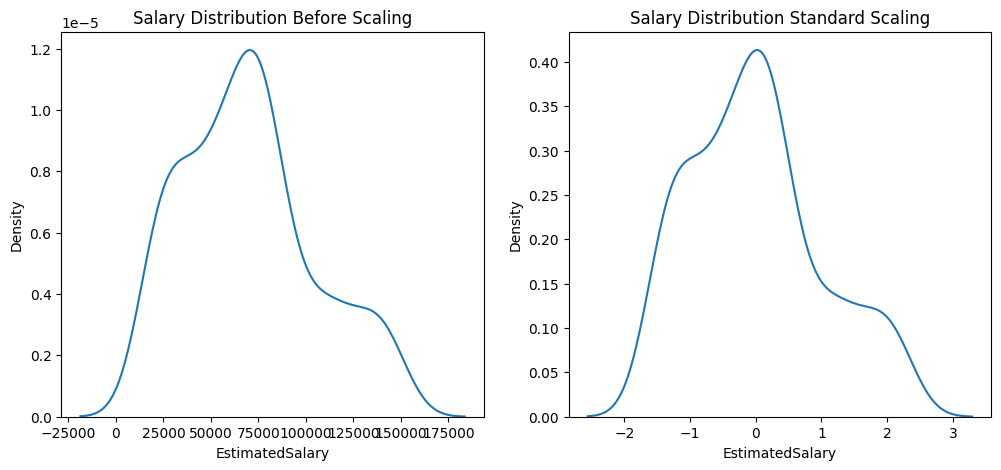

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()


In [45]:
# If we do standardization then mean becomes 0 and standard deviation becomes 1.

# Why is Scaling imporant?

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression


In [47]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()


In [49]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [50]:
y_pred = lr.predict(x_test)
 y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [51]:
from sklearn.metrics import accuracy_score

In [53]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.6583333333333333


# Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier


In [55]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [56]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [63]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [64]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.6583333333333333


In [65]:

df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of Outliers